In [1]:
import cv2
img = cv2.imread("C:/Users/MR.NAIR/Desktop/Land Classification and Identification/datasets/test/beaches/beach_0100.jpg")
img.shape

(360, 540, 3)

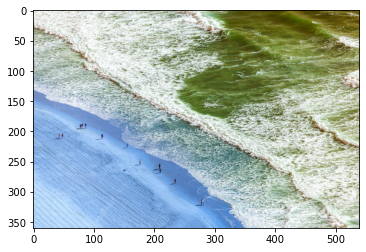

In [2]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [3]:
train_dir="C:/Users/MR.NAIR/Desktop/Land Classification and Identification/datasets/train"
test_dir="C:/Users/MR.NAIR/Desktop/Land Classification and Identification/datasets/test"
val_dir="C:/Users/MR.NAIR/Desktop/Land Classification and Identification/datasets/validation"

In [4]:
#processing data
import tensorflow as tf
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

val_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

In [5]:
#creating datasets
train_data = train_gen.flow_from_directory(train_dir,
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           batch_size = 32
                                           )

test_data = test_gen.flow_from_directory(test_dir,
                                         target_size = (224,224),
                                         class_mode = "categorical",
                                         batch_size = 32
                                         )
val_data = val_gen.flow_from_directory(val_dir,
                                       target_size = (224,224),
                                       class_mode = "categorical",
                                       batch_size = 32
                                       )

Found 3500 images belonging to 7 classes.
Found 1750 images belonging to 7 classes.
Found 1050 images belonging to 7 classes.


In [6]:
image, label = train_data.next()
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 7)


In [7]:
class_label = list(train_data.class_indices.keys())

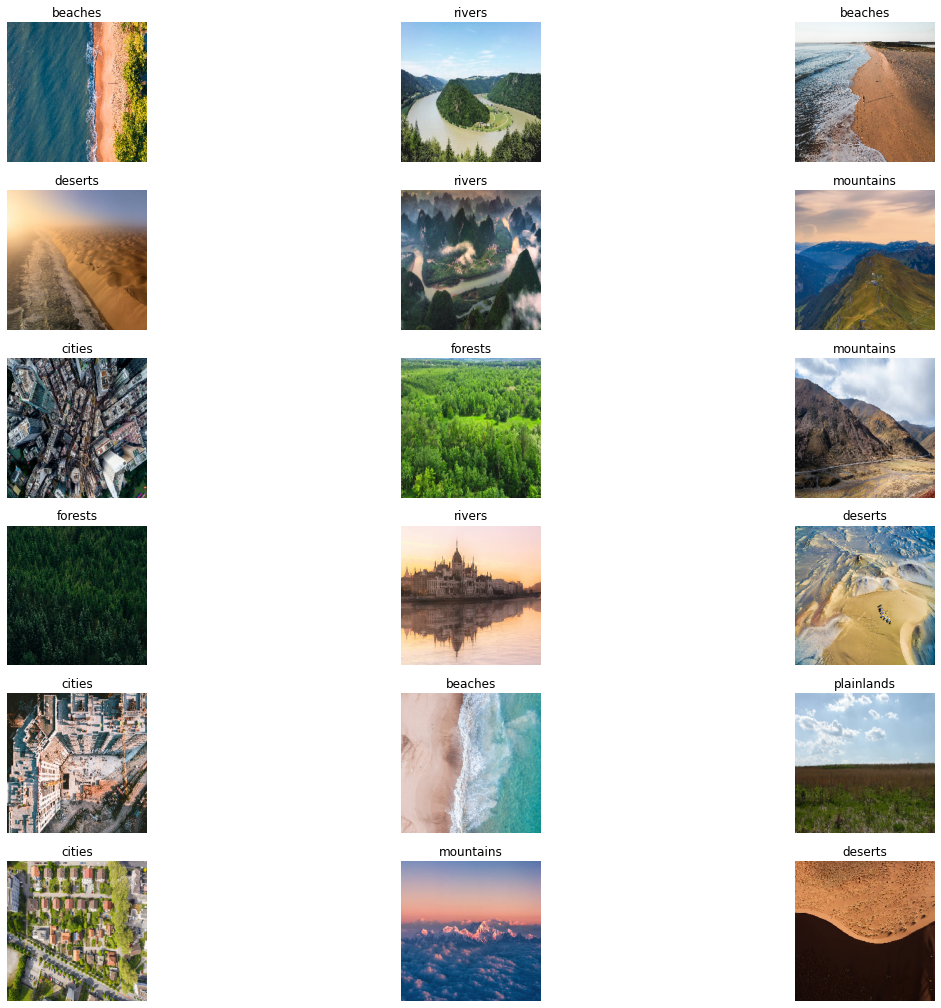

In [8]:
# visualizing the dataset

import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(20,18))

image, label = train_data.next()
for i in range(18):
  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(class_label[tf.argmax(label[i])])

  plt.axis("off")

In [10]:
#building model
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.Sequential([
                             layers.Conv2D(filters= 32, kernel_size= 2, activation="relu", input_shape=(224,224,3)),
                             layers.MaxPooling2D(pool_size= 2),
                              layers.Flatten(),

                             layers.Dense(256, activation="relu"),

                             layers.Dense(7, activation="softmax")
                            ])

In [11]:
#compiling model
model.compile(optimizer =  tf.keras.optimizers.Adam(learning_rate= 0.001),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics=["accuracy"]
              )

In [12]:
#fitting model
model.fit(train_data,
          epochs = 7,
          steps_per_epoch = len(train_data),
          validation_data = val_data,
          validation_steps = len(val_data)
          )

Epoch 1/7
110/110 [==============================] - 1232s 11s/step - loss: 7.6057 - accuracy: 0.4634 - val_loss: 1.2083 - val_accuracy: 0.6495
Epoch 2/7
110/110 [==============================] - 1210s 11s/step - loss: 0.8177 - accuracy: 0.7134 - val_loss: 0.6106 - val_accuracy: 0.7676
Epoch 3/7
110/110 [==============================] - 1210s 11s/step - loss: 0.4964 - accuracy: 0.8317 - val_loss: 0.2829 - val_accuracy: 0.9162
Epoch 4/7
110/110 [==============================] - 1238s 11s/step - loss: 0.2668 - accuracy: 0.9217 - val_loss: 0.1730 - val_accuracy: 0.9562
Epoch 5/7
110/110 [==============================] - 1234s 11s/step - loss: 0.1360 - accuracy: 0.9694 - val_loss: 0.0802 - val_accuracy: 0.9886
Epoch 6/7
110/110 [==============================] - 1283s 12s/step - loss: 0.1213 - accuracy: 0.9751 - val_loss: 0.1493 - val_accuracy: 0.9667
Epoch 7/7
110/110 [==============================] - 1598s 15s/step - loss: 0.1649 - accuracy: 0.9586 - val_loss: 0.0751 - val_accuracy:

In [13]:
model_evaluation = model.evaluate(test_data)

55/55 [==============================] - 607s 11s/step - loss: 0.0771 - accuracy: 0.9869


In [14]:
print(f"Model Accuracy: {model_evaluation[1] * 100: 0.2f} %")

Model Accuracy:  98.69 %


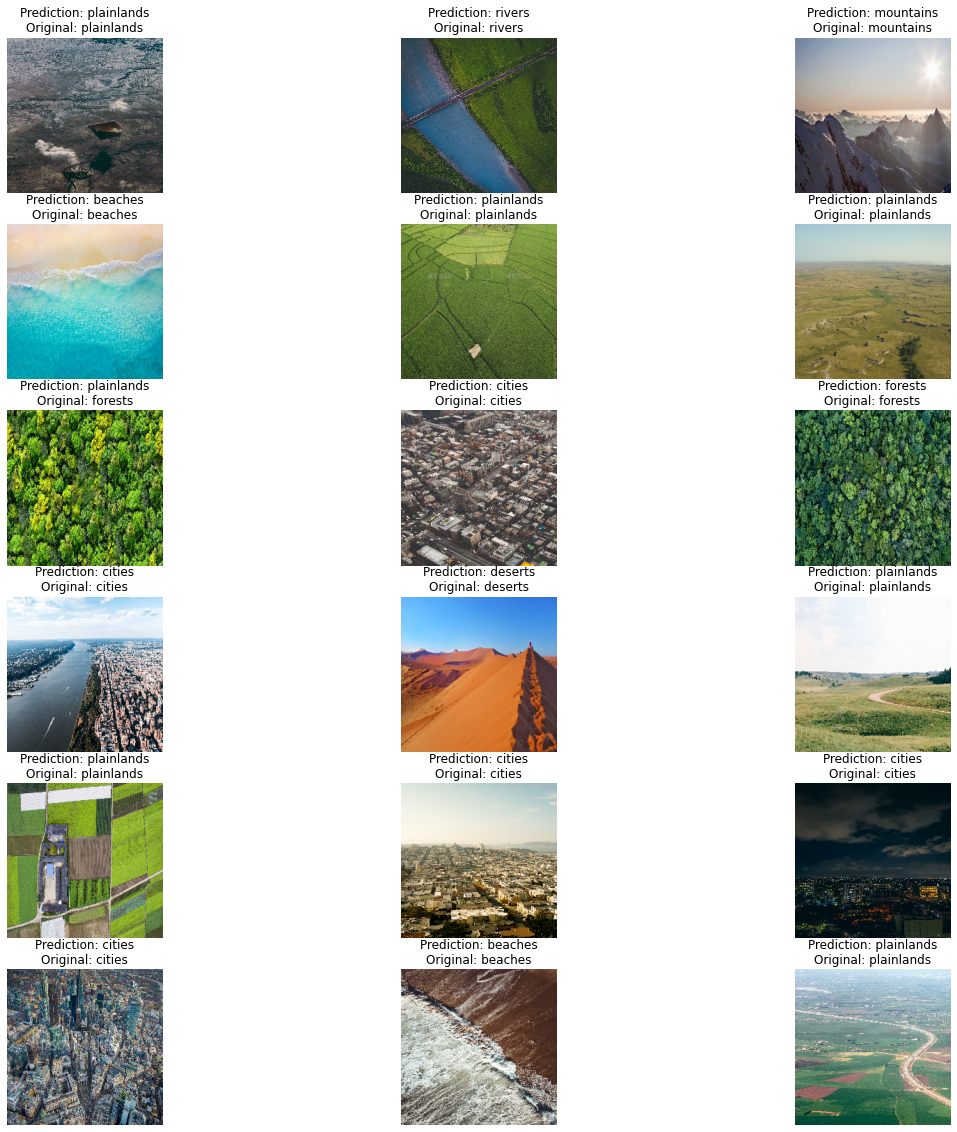

In [16]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(20,20))

image, label = test_data.next()
for i in range(18):
  model_pred = model.predict(image)
  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(f"Prediction: {class_label[tf.argmax(model_pred[i])]}\nOriginal: {class_label[tf.argmax(label[i])]}")

  plt.axis("off")